#### Pridicting Heart Disease by using Principal Component Analysis (PCA)

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Perform PCA and find the variance from 2 components


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [1]:
#importing nessasary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
%matplotlib inline
import os
import warnings 
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [32]:
def plot_data(column_name, data):
    plt.figure(figsize = (15,5))
    
    #Histogram plot using sns.histoplot()
    plt.subplot(1,3,1)
    sns.histplot(data[column_name], kde = False, bins=10)
    plt.title(f"{column_name.capitalize()} Histogram")
    
    #Distribution plot using sns.distplot()
    plt.subplot(1,3,2)
    sns.distplot(data[column_name], hist = True)
    plt.title(f"{column_name.capitalize()} Distribution plot")
    
    
    #Box plot using sns.boxplot()
    plt.subplot(1,3,3)
    sns.boxplot(data[column_name], orient = 'v')
    plt.title(f"{column_name.capitalize()} Box plot")
    
    plt.show()


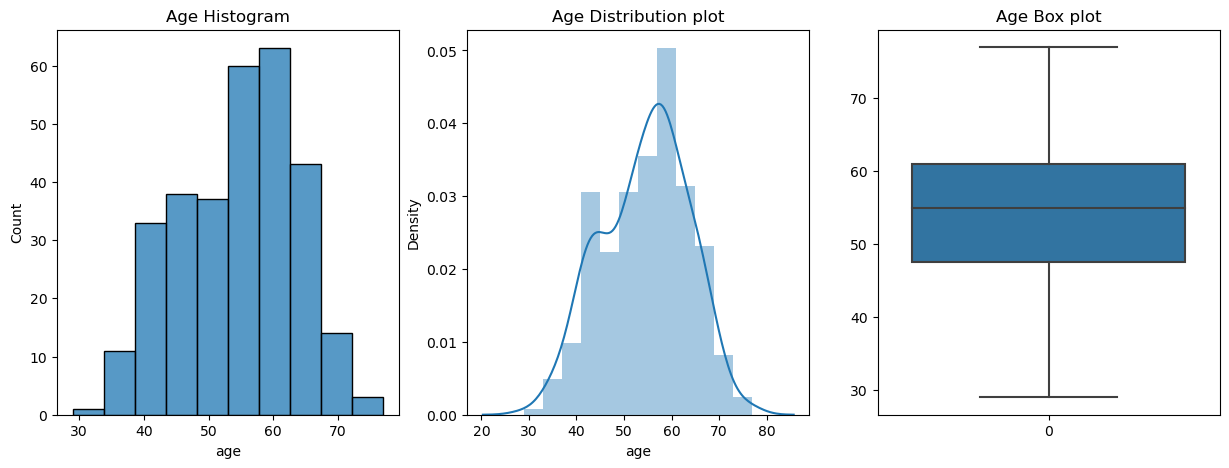

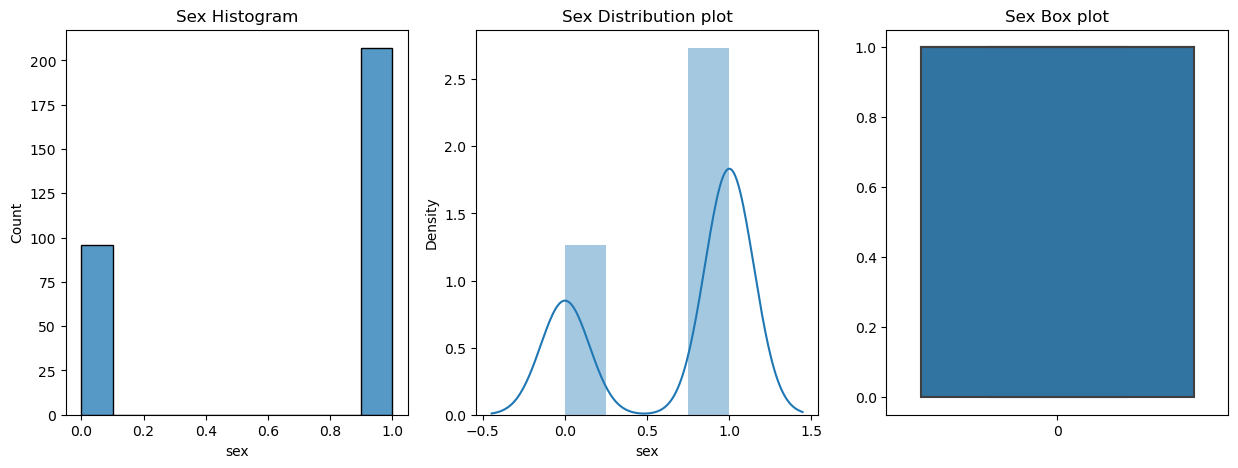

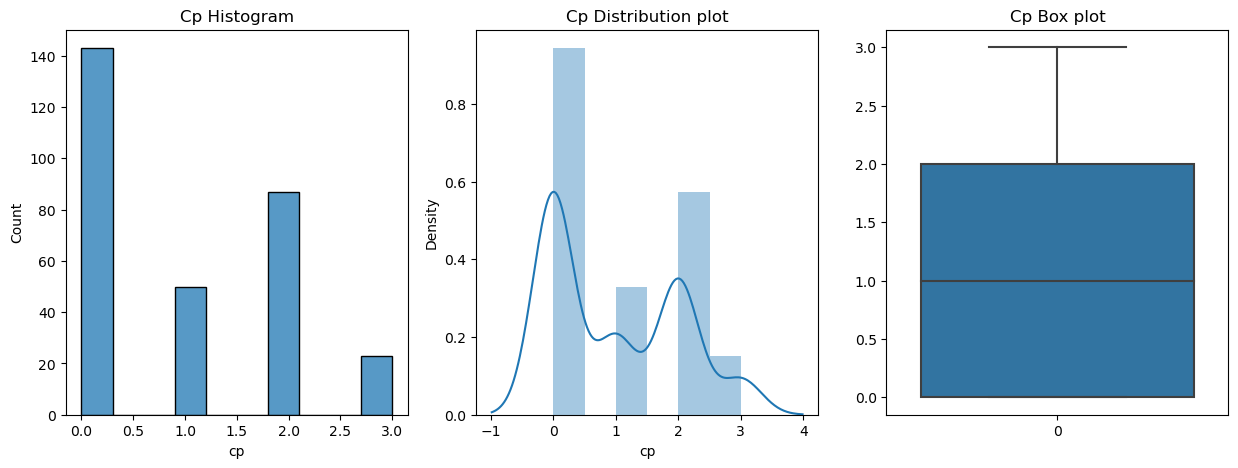

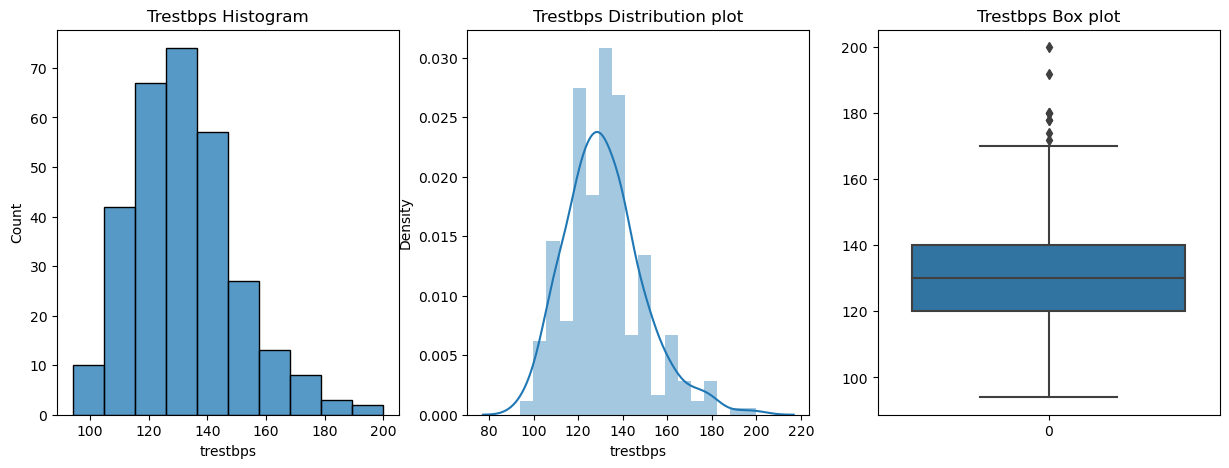

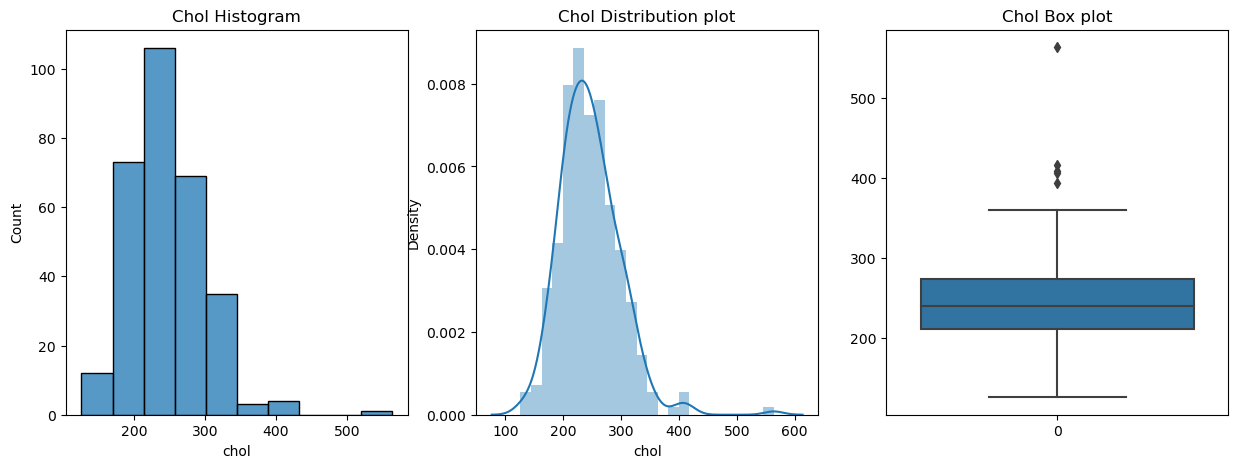

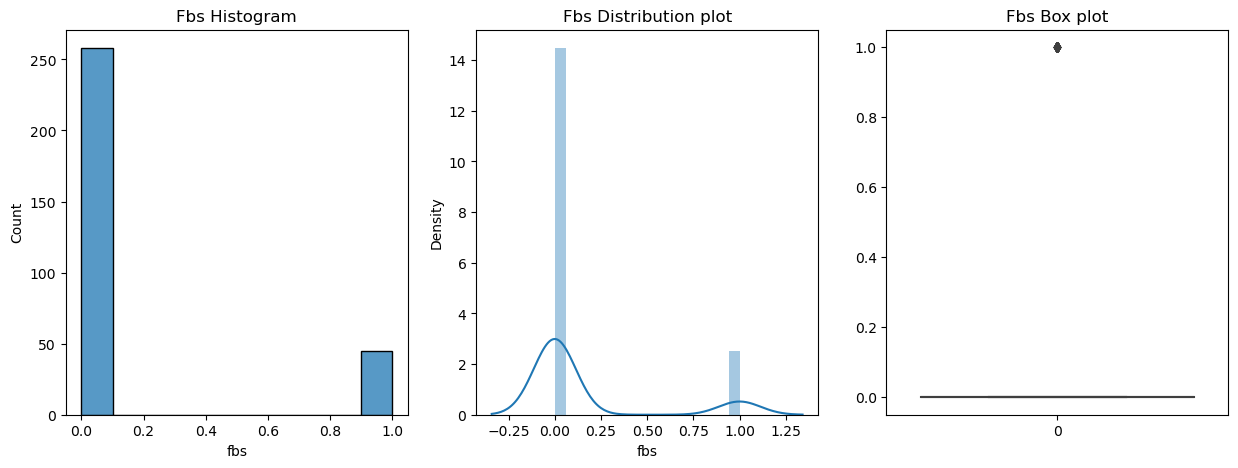

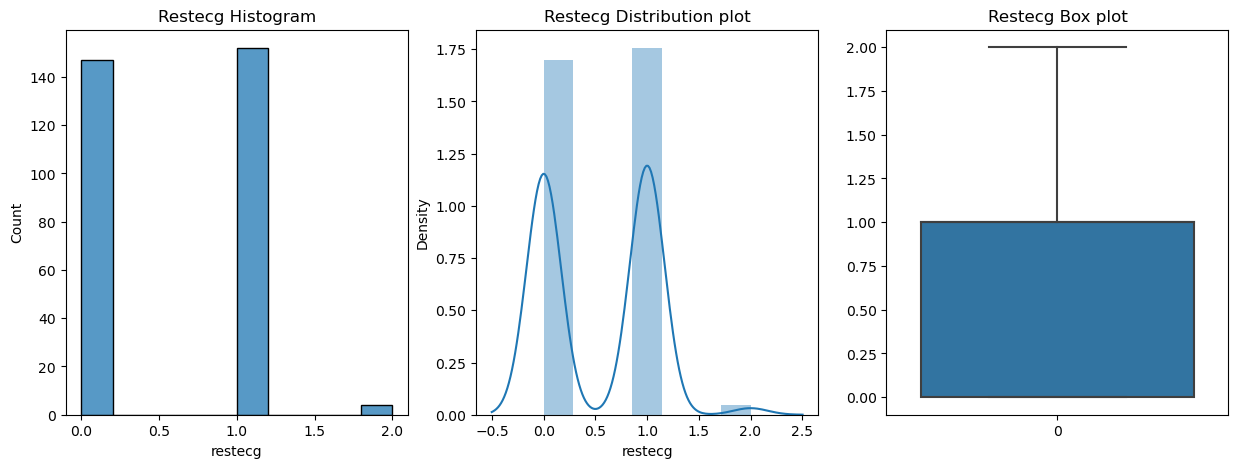

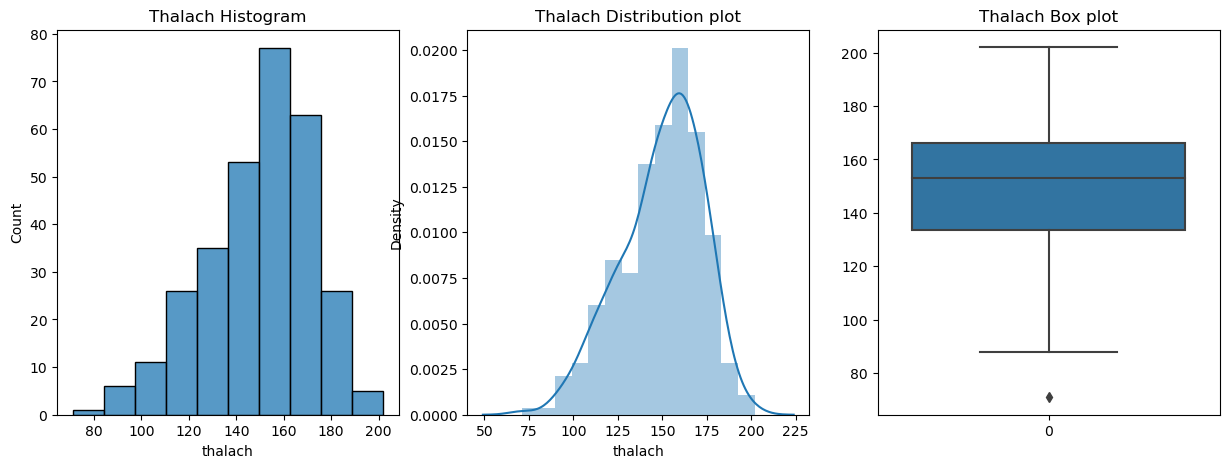

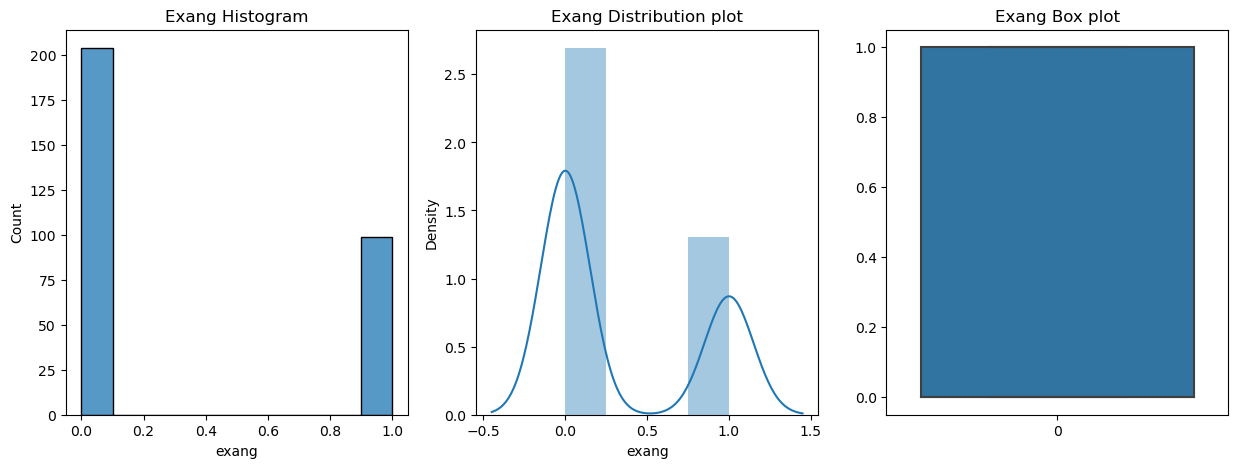

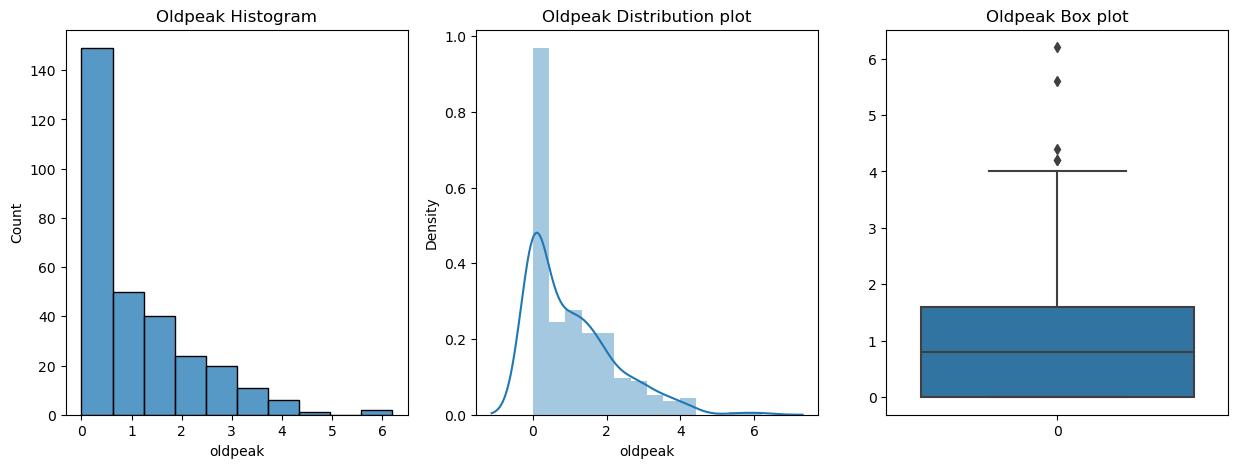

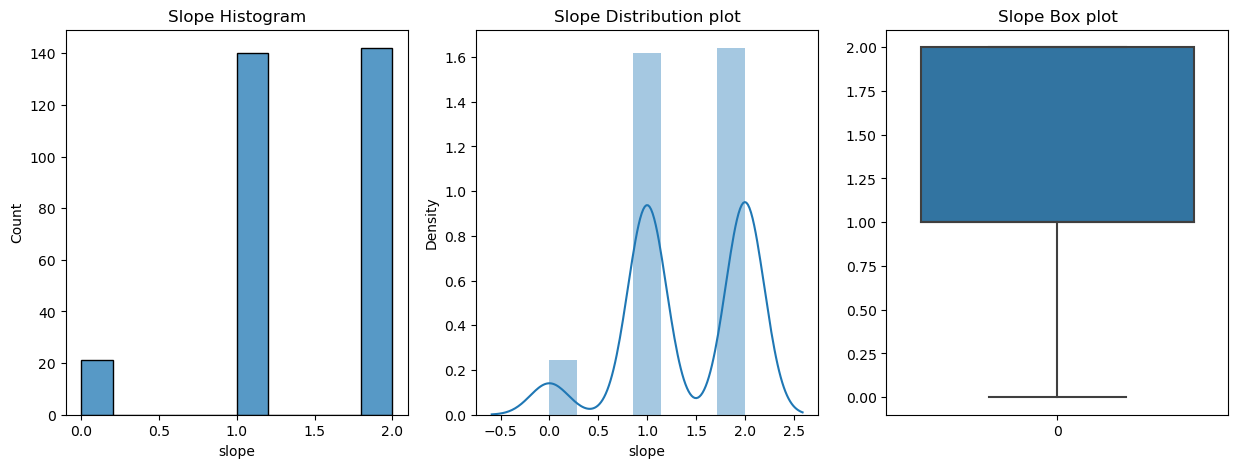

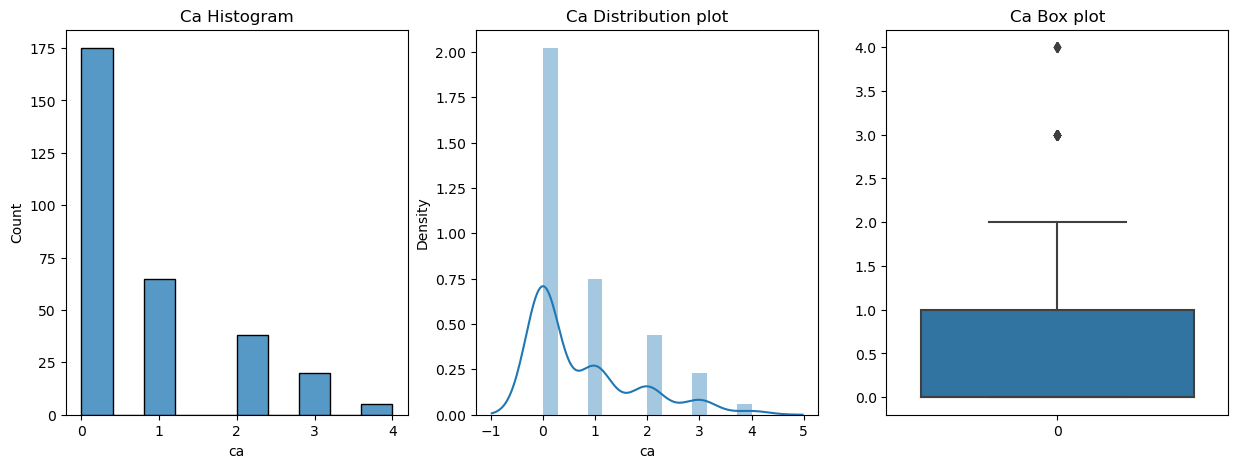

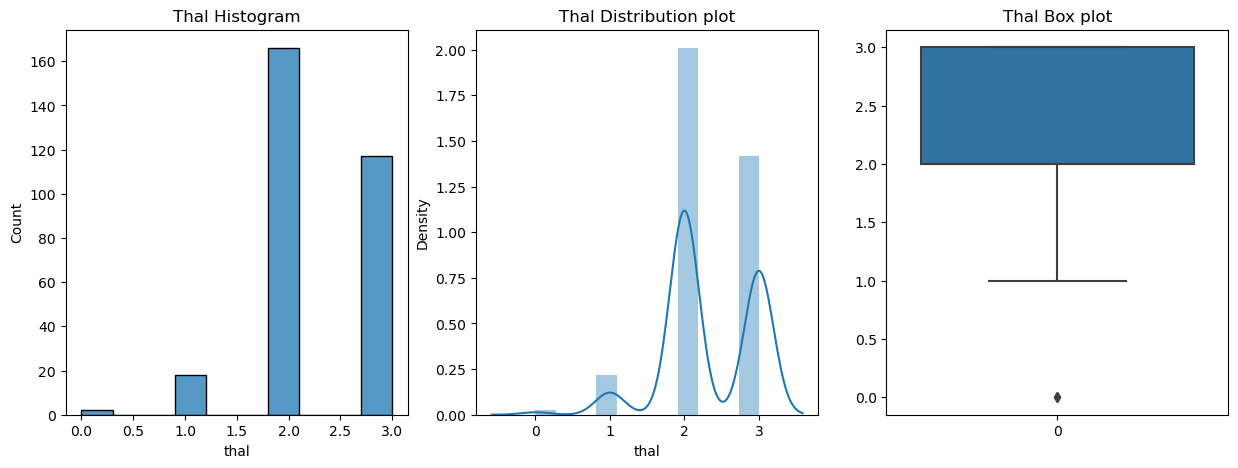

In [33]:
  for i in df.iloc[:,0:-1]:
    plot_data(i, df)

In [34]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

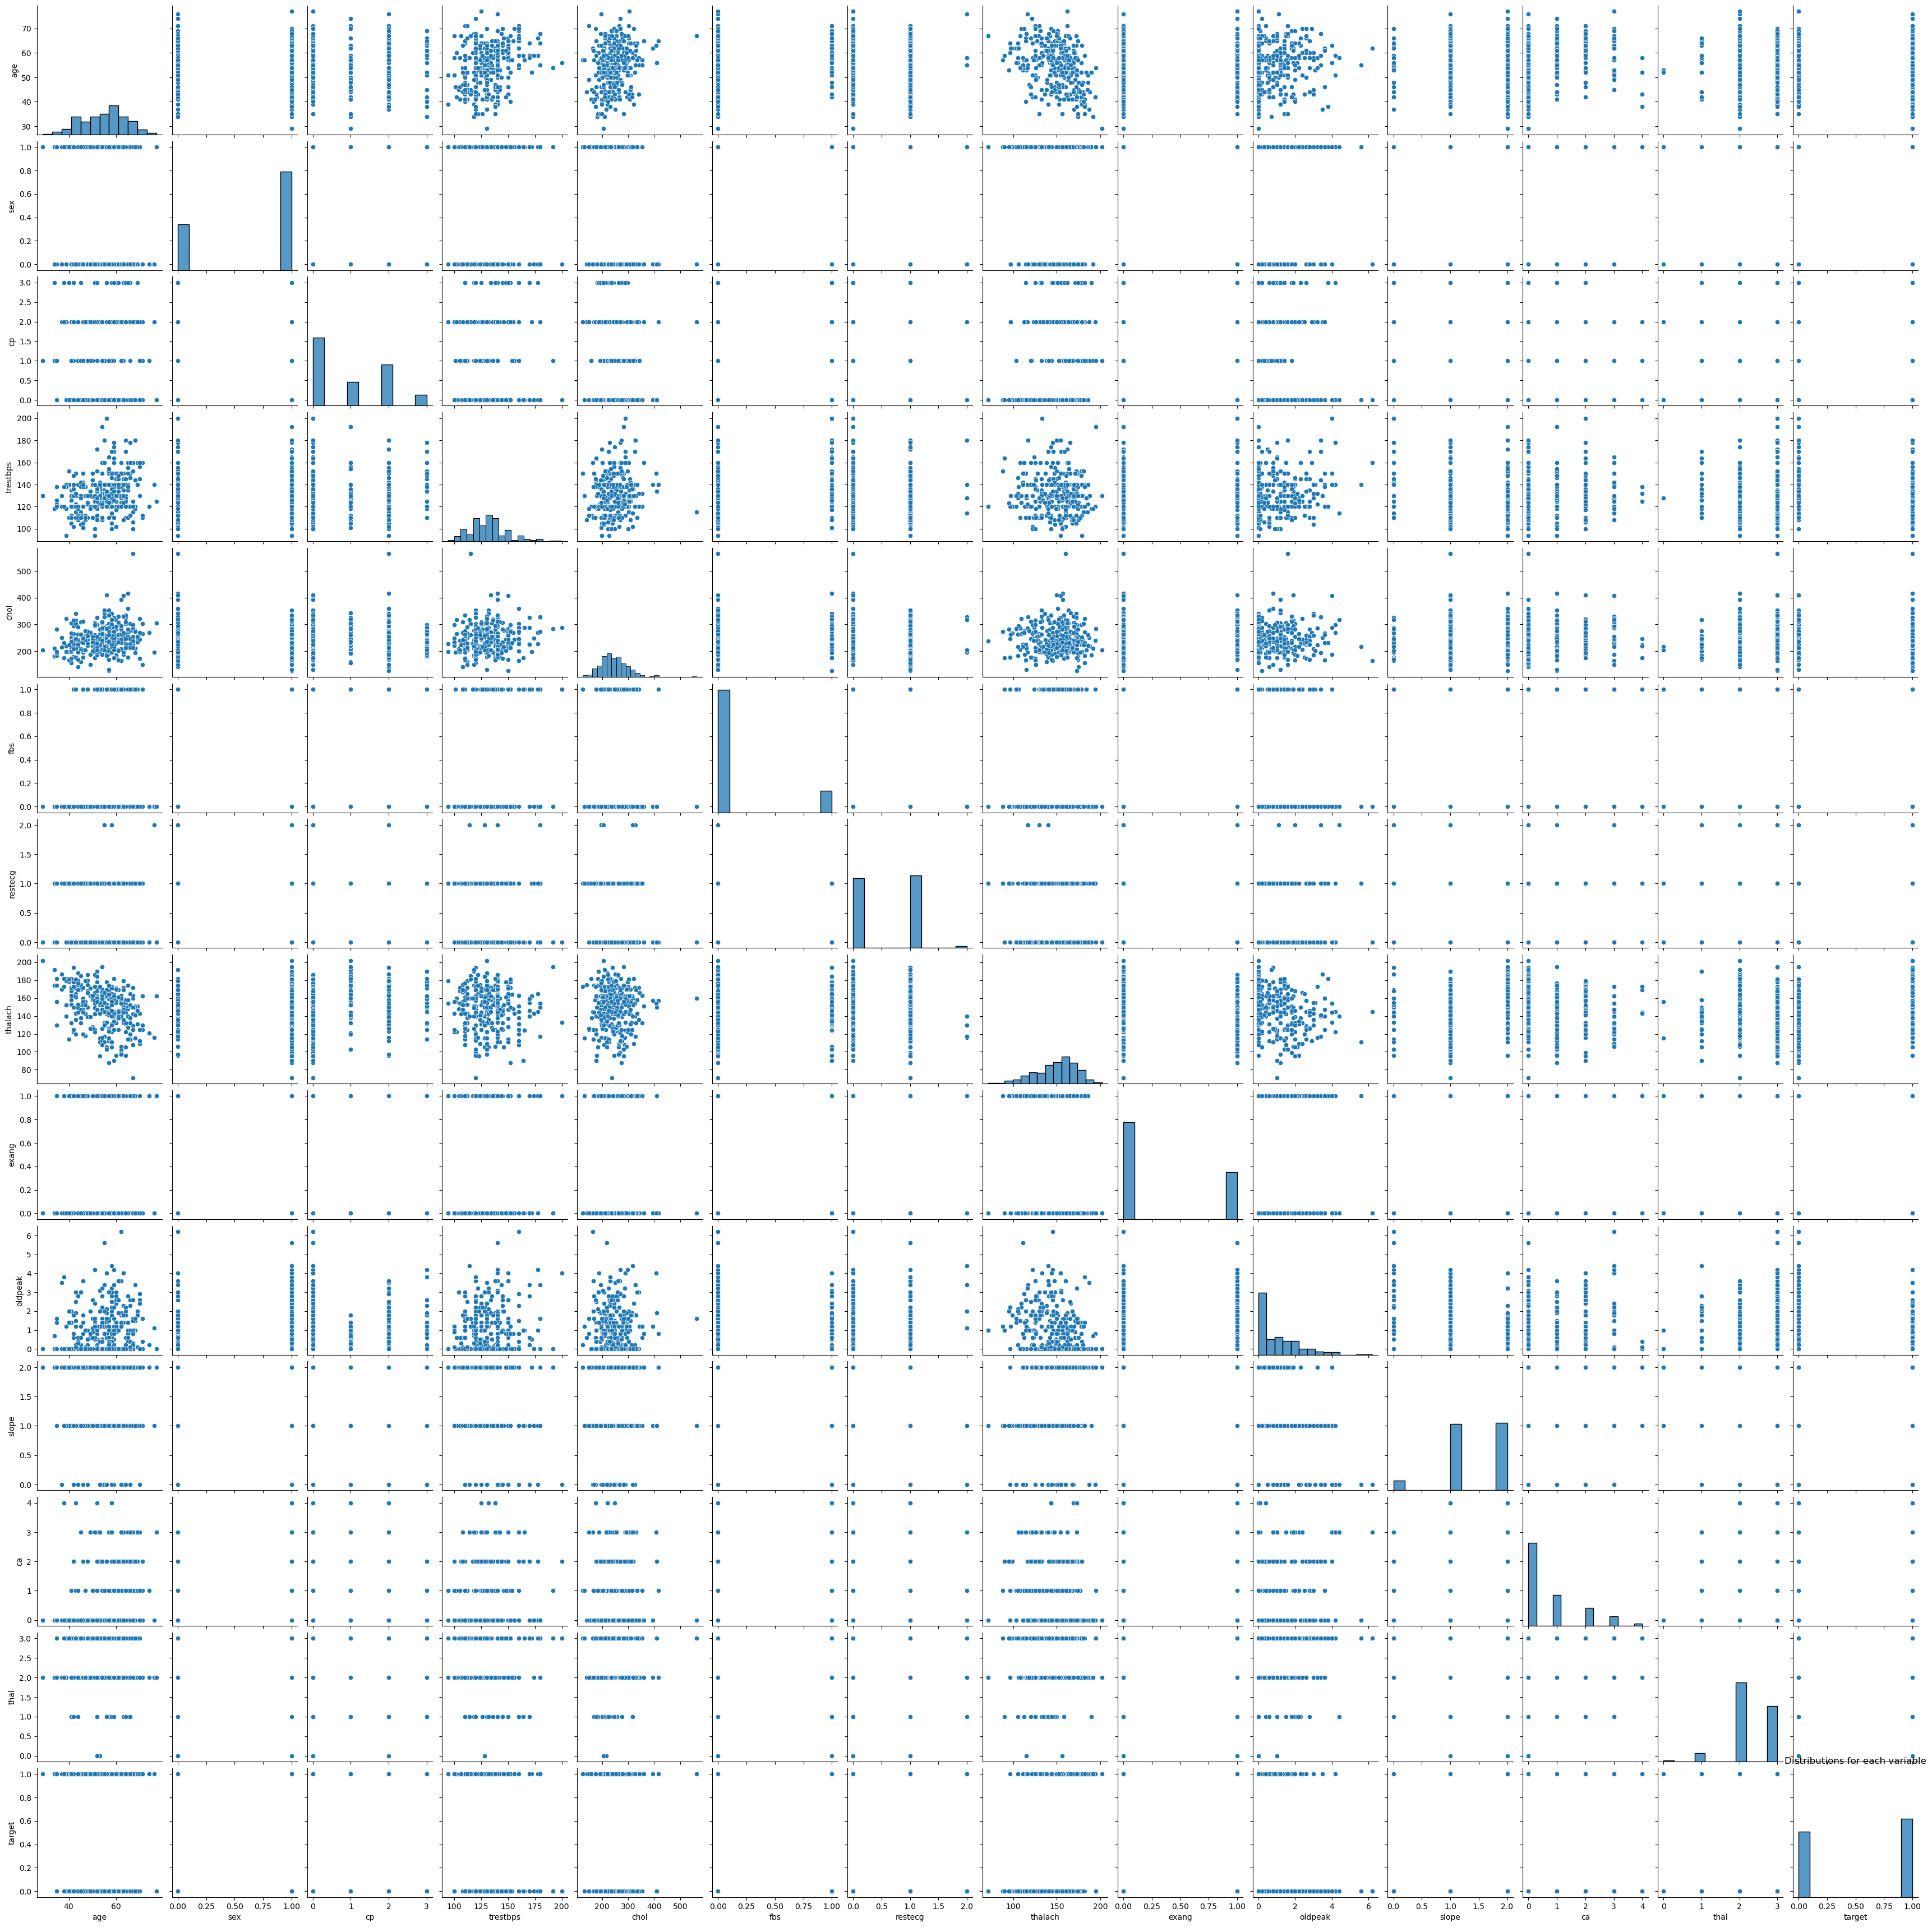

In [36]:
sns.pairplot(data=df)
plt.title('Distributions for each variable')
plt.show()

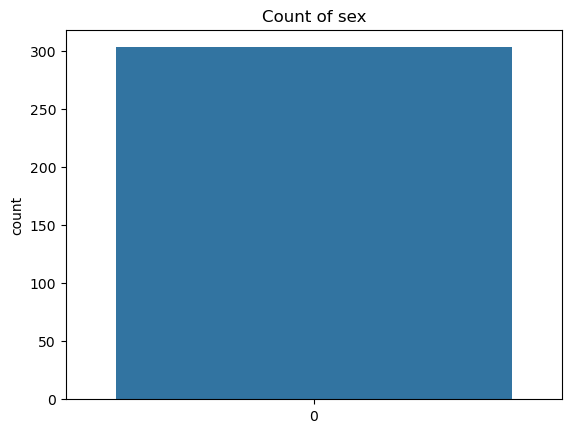

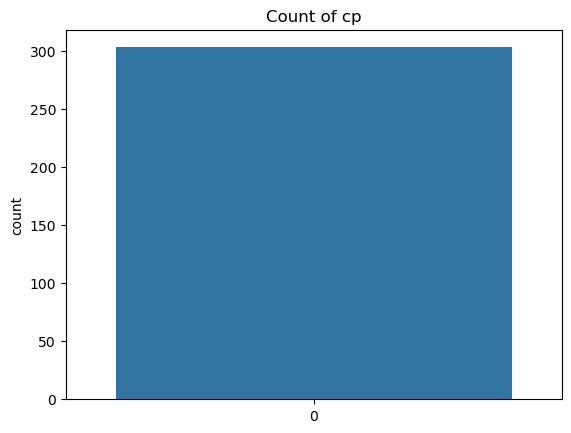

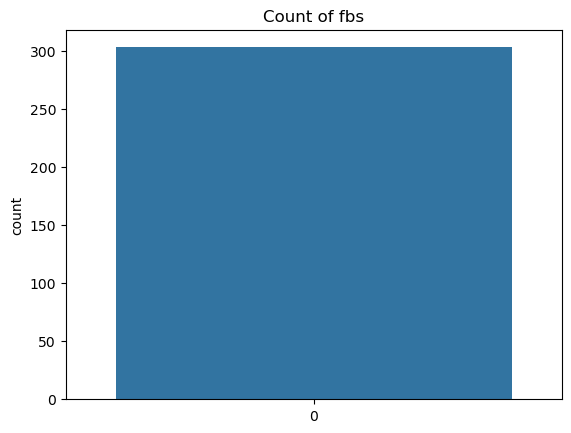

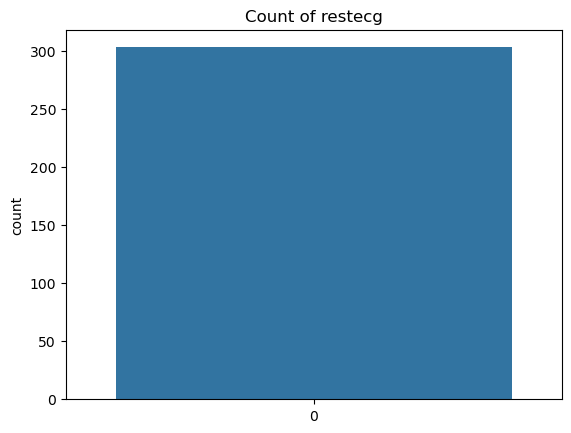

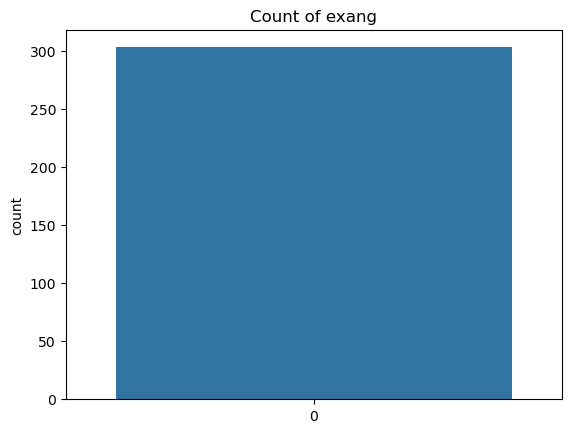

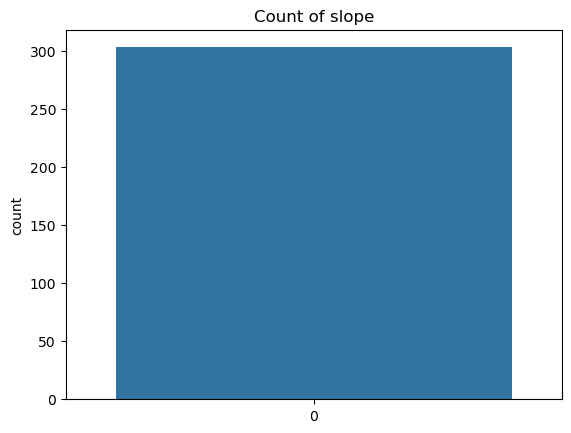

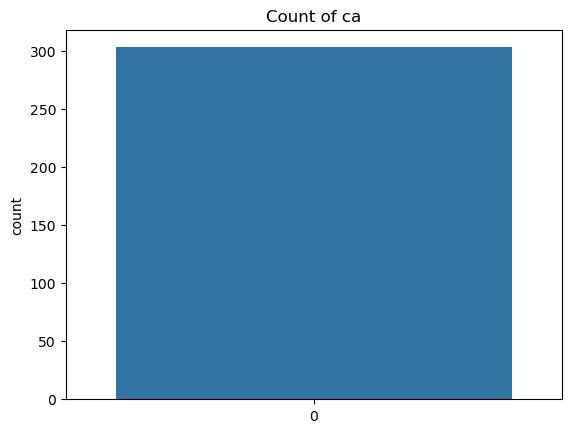

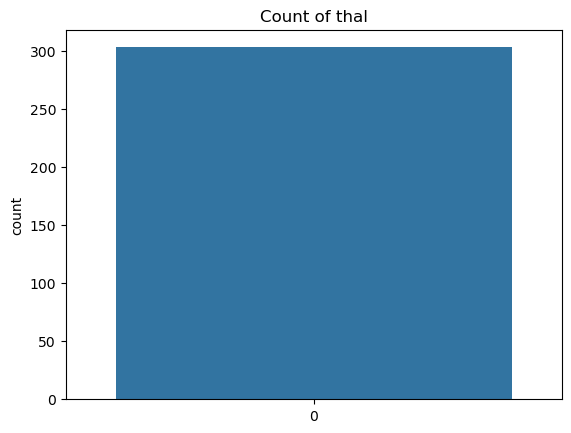

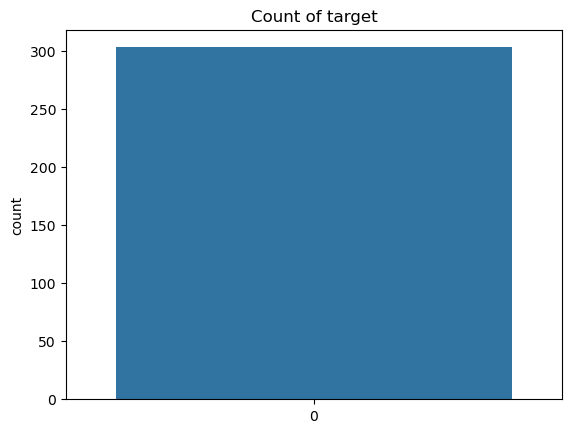

In [22]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for feature in categorical_features:
    sns.countplot(df[feature])
    plt.title(f'Count of {feature}')
    plt.show()

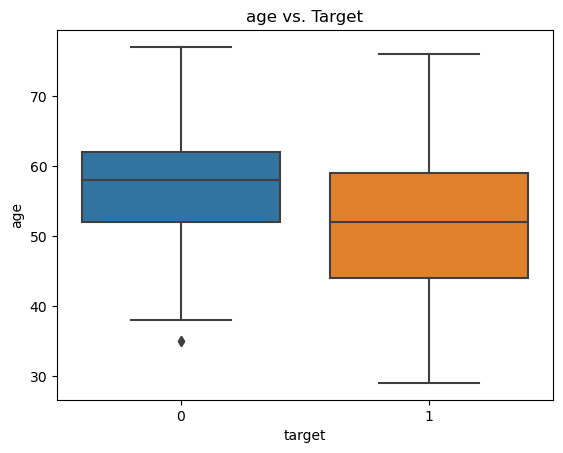

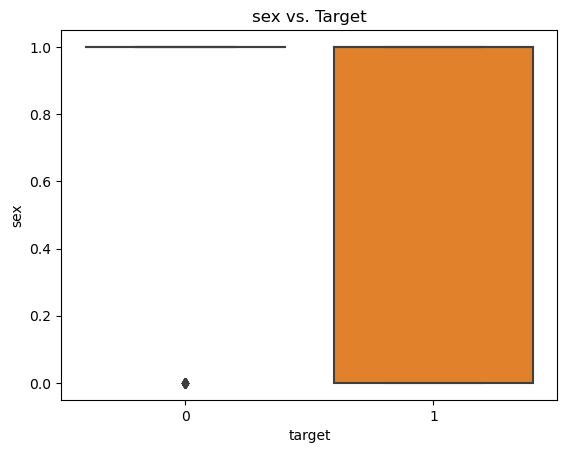

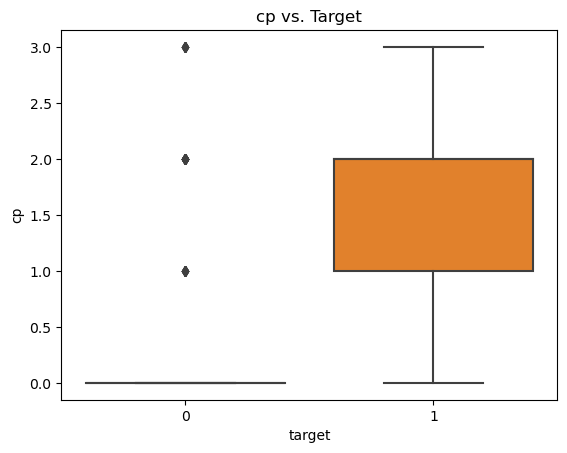

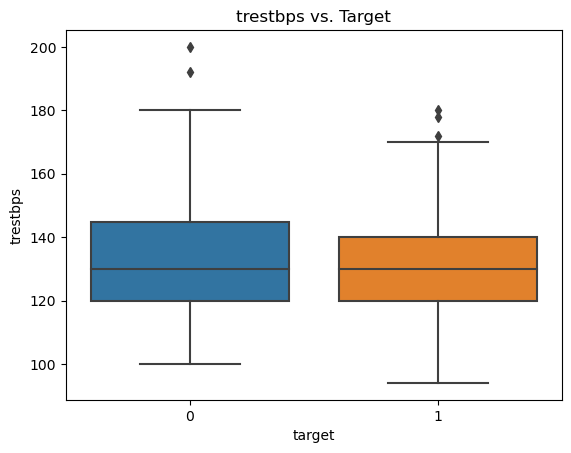

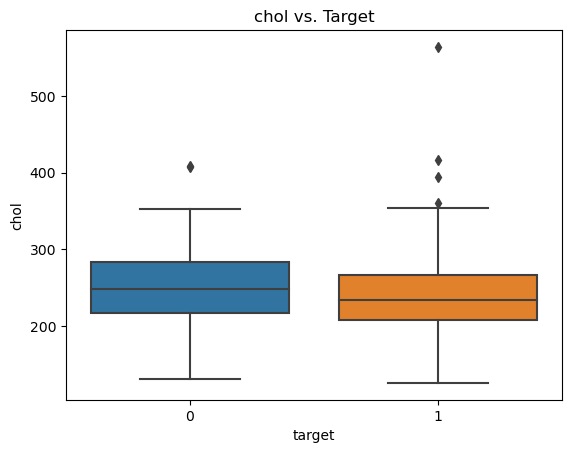

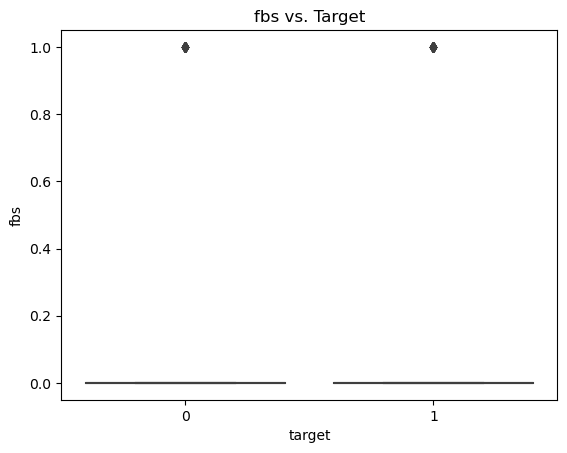

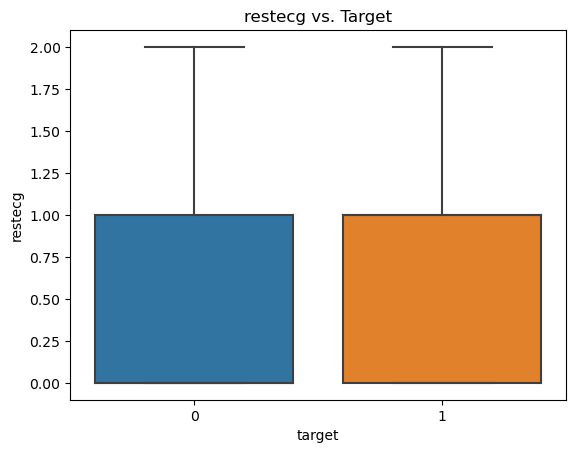

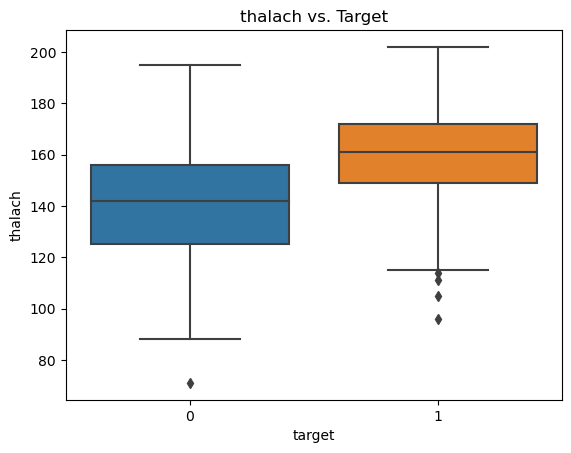

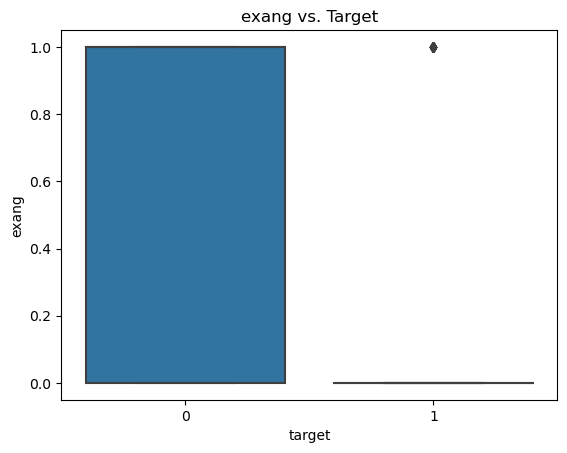

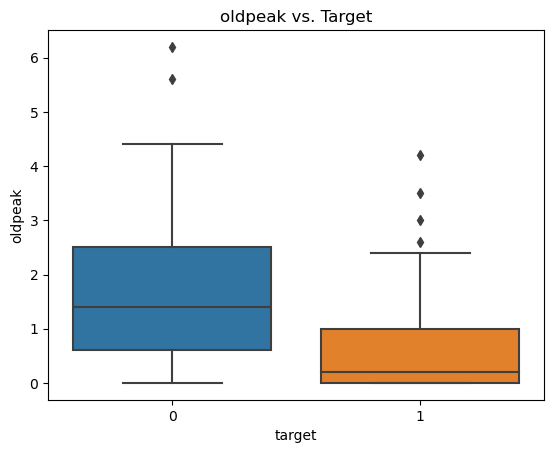

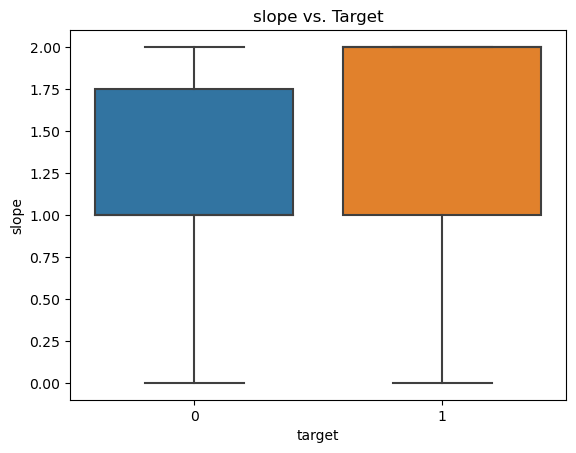

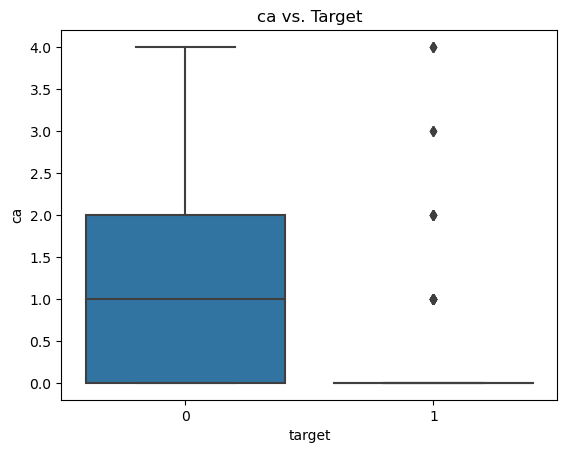

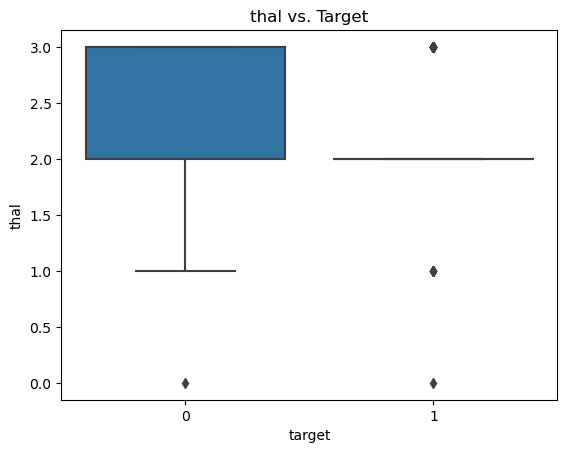

In [19]:
for feature in df.iloc[:,0:-1]:
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs. Target')
    plt.show()

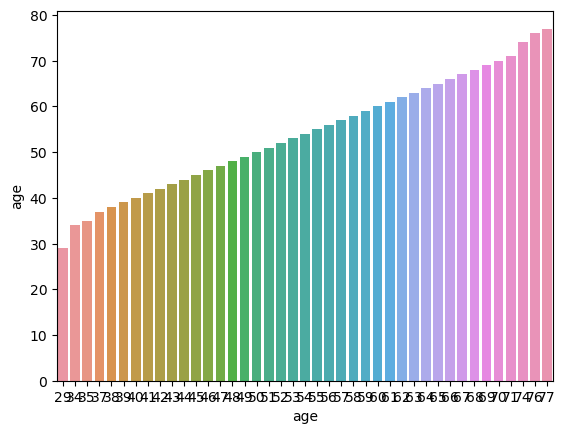

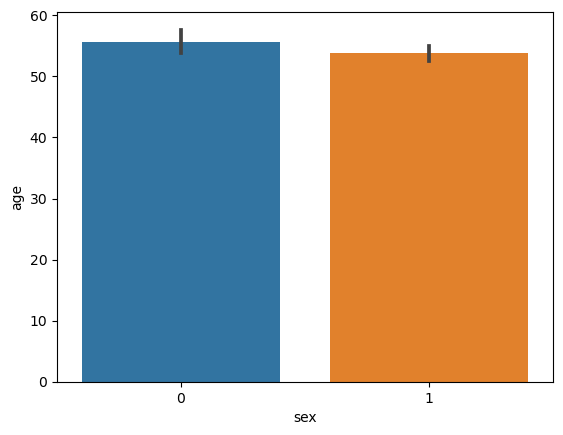

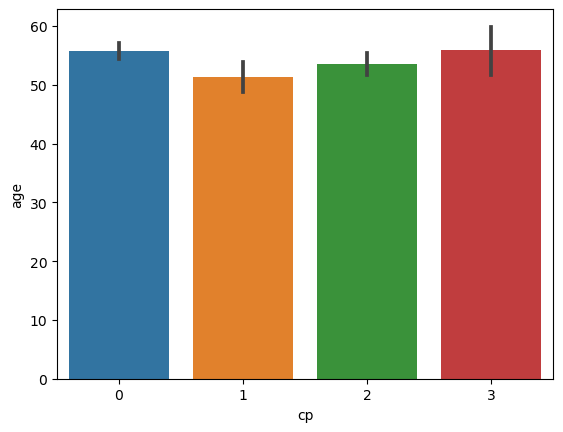

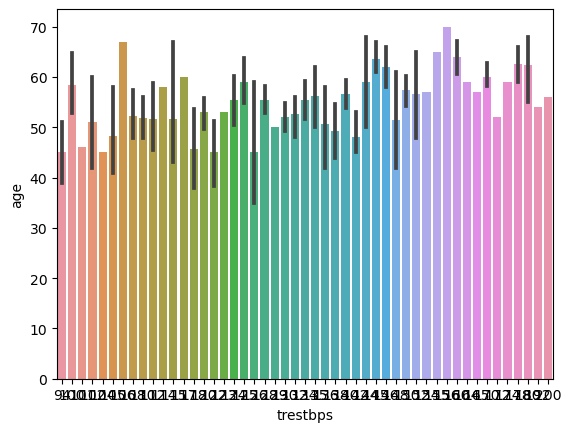

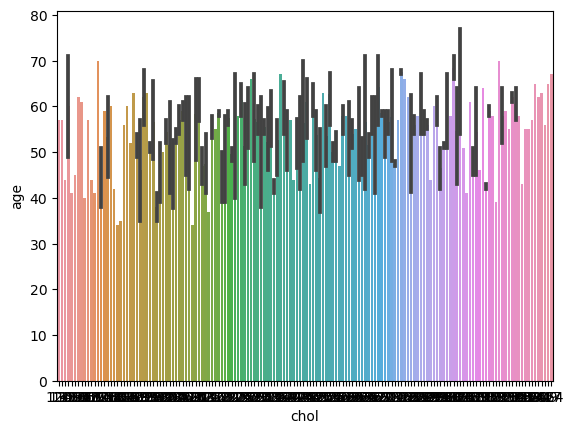

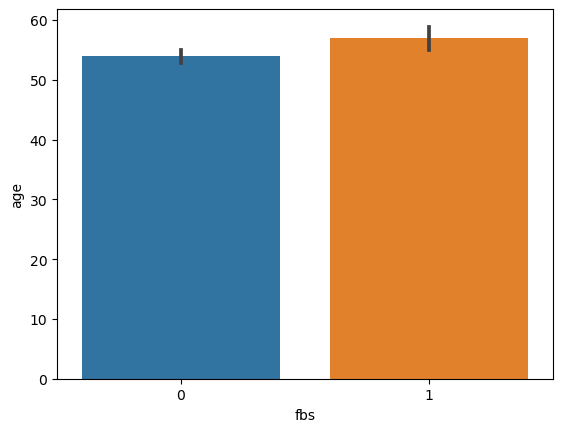

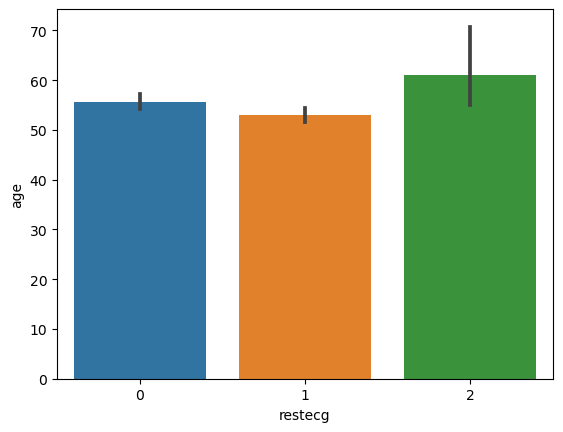

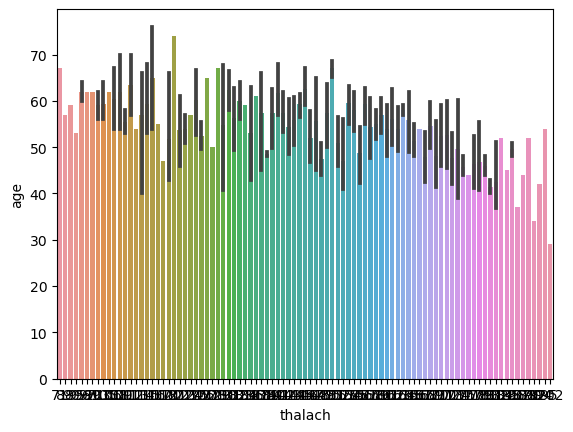

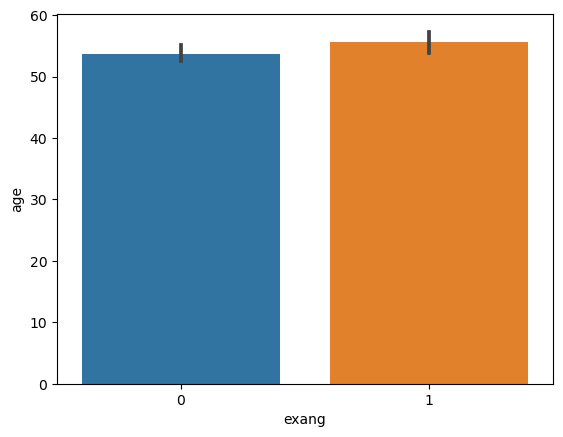

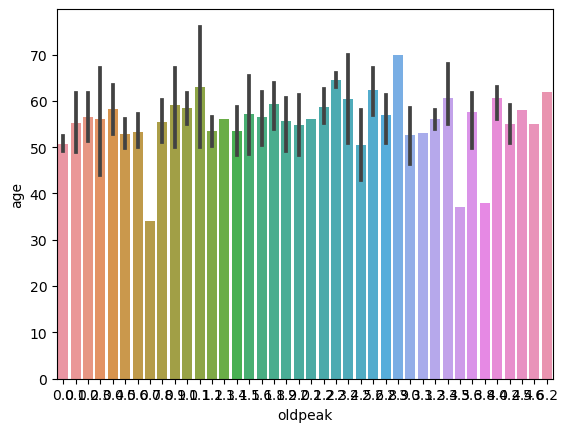

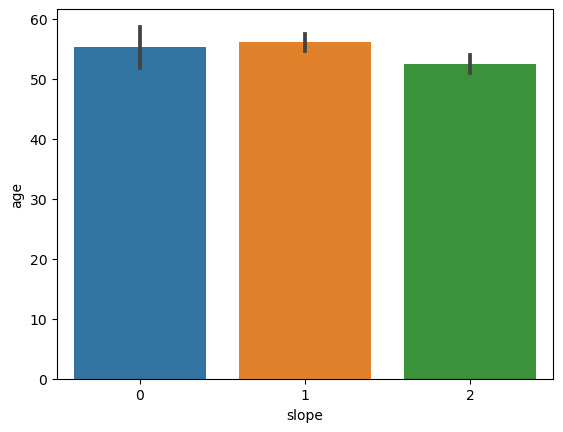

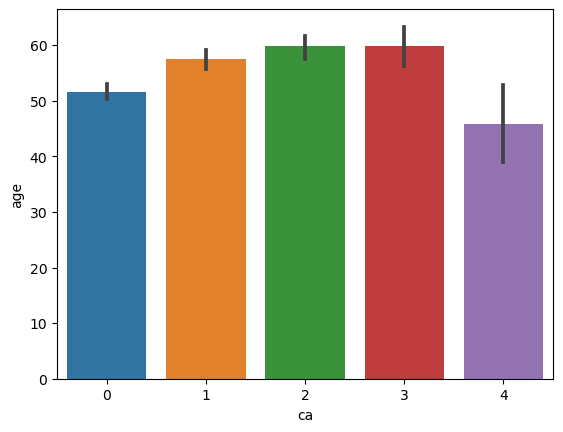

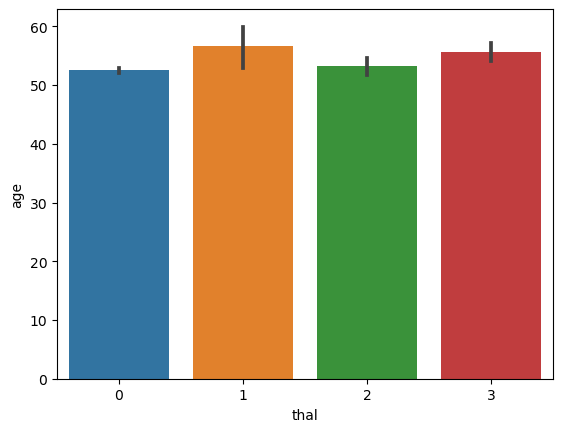

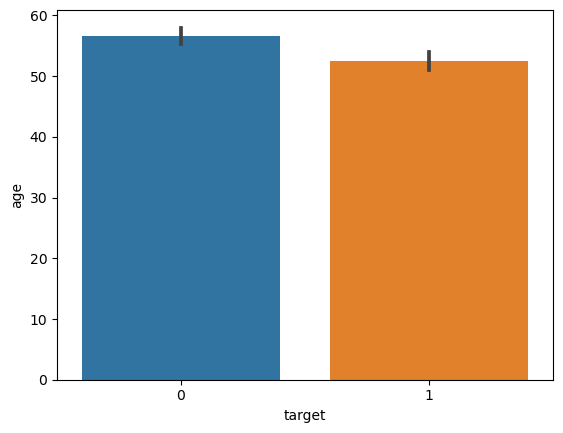

In [27]:
for col in df.columns:
    g = sns.barplot(data = df, x = col, y = 'age');
    plt.show()

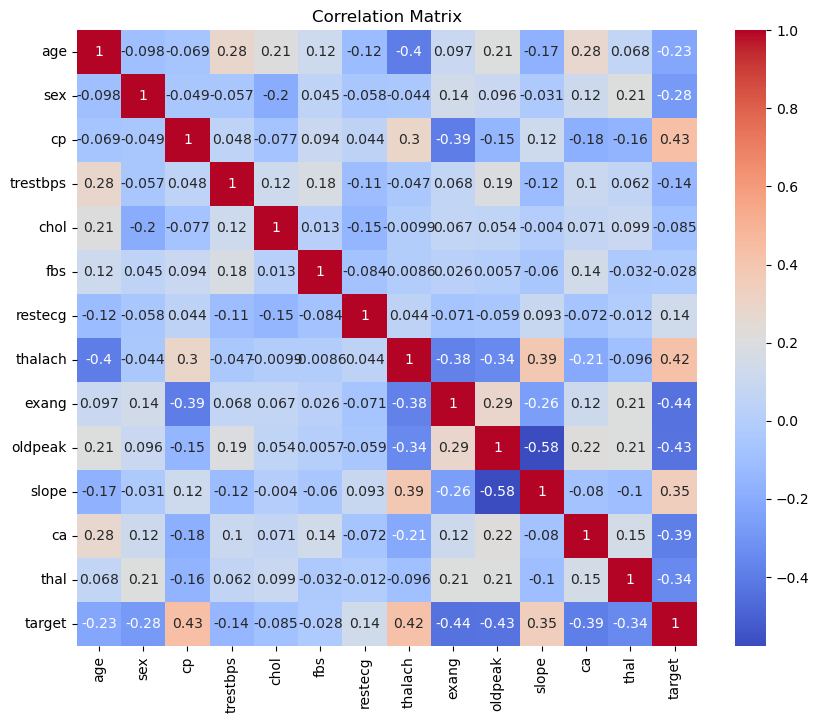

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

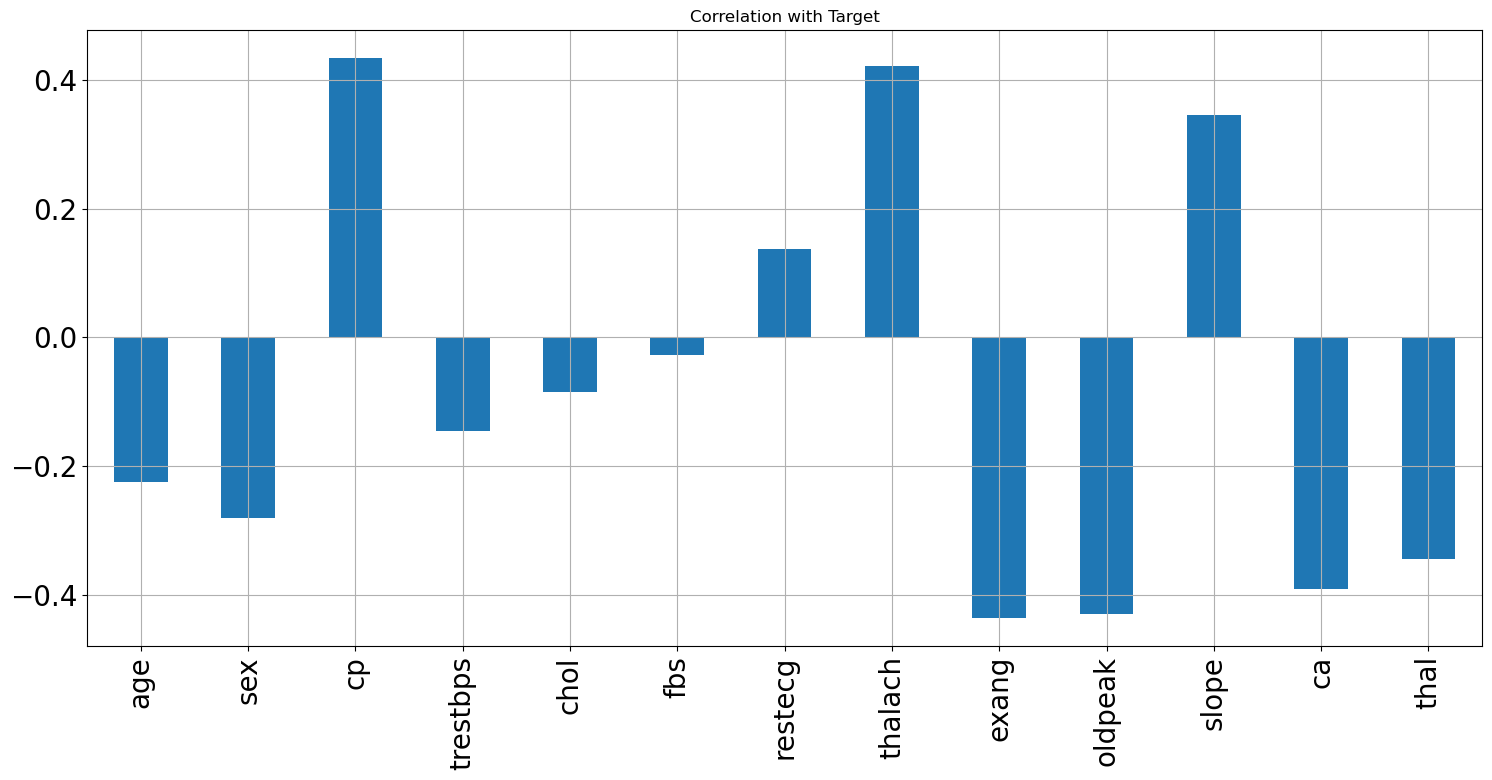

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'df' and you want to analyze correlations
# X is the DataFrame without the 'target' column
X = df.drop(['target'], axis=1)

# Calculate the correlations between features in X and the 'target' column
correlations = X.corrwith(df['target'])

# Create a bar plot to visualize the correlations
correlations.plot.bar(
    figsize=(18, 8),      # Figure size
    title="Correlation with Target",  # Plot title
    fontsize=20,           # Font size
    rot=90,                # Rotate x-axis labels for better visibility
    grid=True              # Show grid lines
)

# Display the plot
plt.show()


In [46]:
X = df.drop('target', axis=1)
y = df['target']

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.values)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

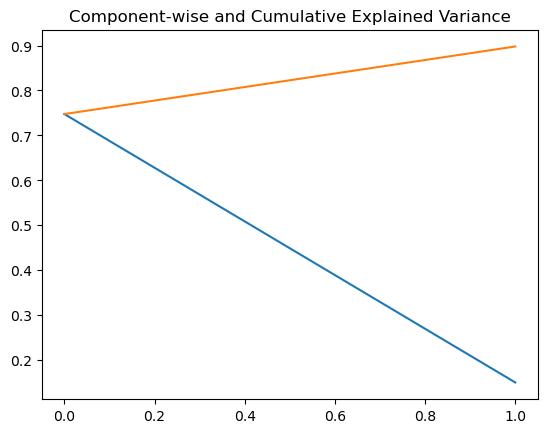

In [52]:
plt.plot(range(2), pca.explained_variance_ratio_)
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In [53]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

In [54]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [55]:
# Add the target variable to the DataFrame
pca_df['target'] = y

In [56]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance Explained by the Two Components:", explained_variance_ratio)

Variance Explained by the Two Components: [0.21254053 0.11820708]


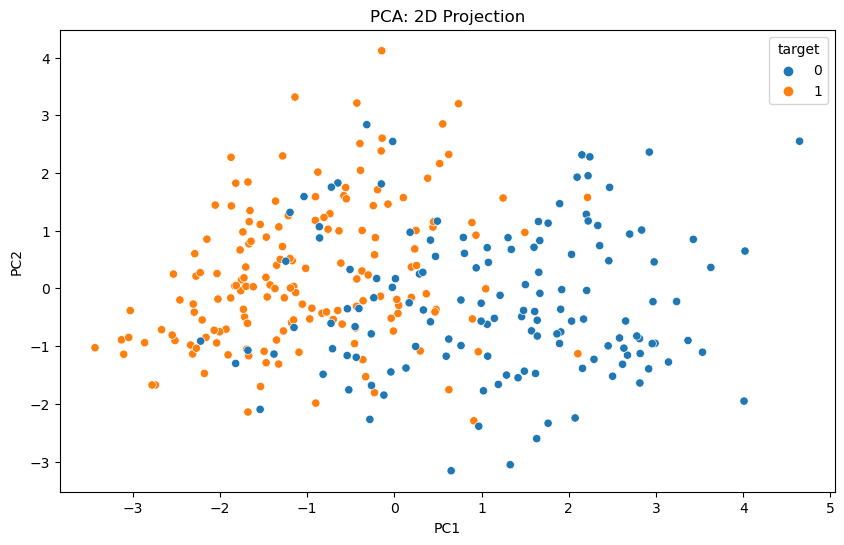

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df)
plt.title("PCA: 2D Projection")
plt.show()

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def pca_results(pca_df, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_) + 1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns=list(pca_df.keys()))
    components.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns=['Explained Variance'])
    variance_ratios.index = dimensions
    
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot the feature weights as a function of the components
    components.plot(ax=ax, kind='bar')
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    
    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i - 0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f" % (ev))
    
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis=1)


             Explained Variance     PC1     PC2  target
Dimension 1              0.6328  0.9787 -0.0174 -0.2048
Dimension 2              0.3398  0.0331  0.9967  0.0736
Dimension 3              0.0275  0.2028 -0.0788  0.9760


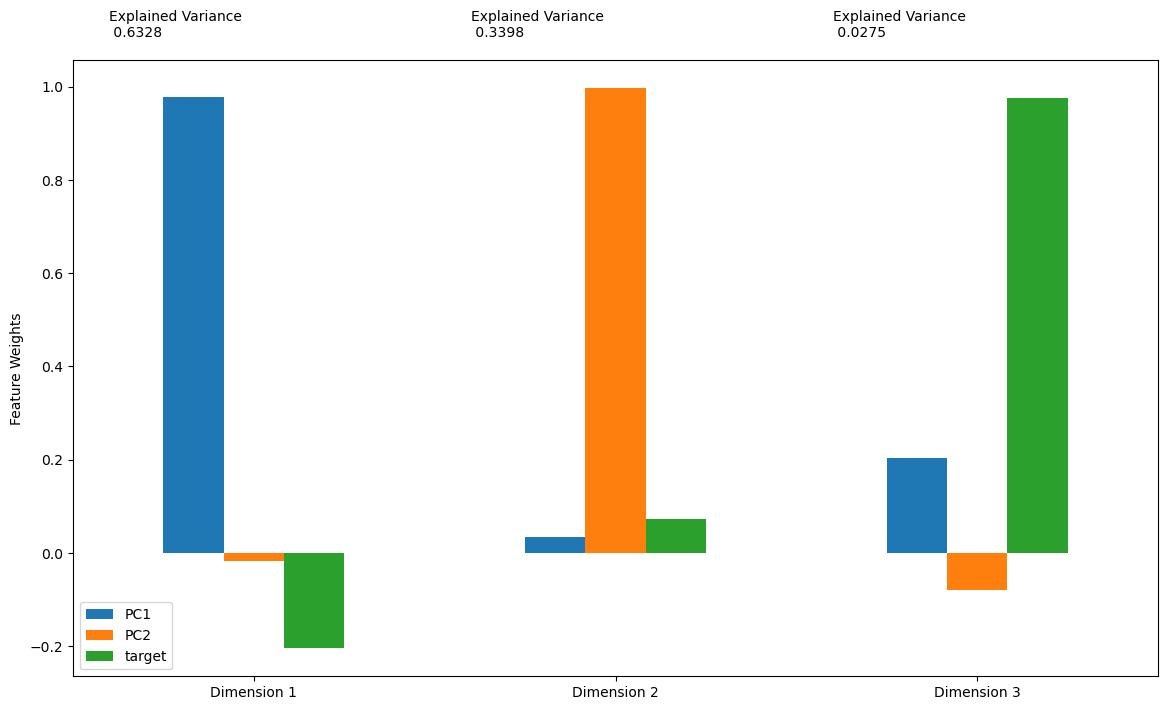

In [67]:
from sklearn.decomposition import PCA

# Assuming you have a 'good_data' DataFrame and want to perform PCA with n_components
# Create and fit the PCA model
pca = PCA(n_components=3)  # Specify the number of components you want to retain
pca.fit(pca_df)

# Call the pca_results function to get the results and visualize
result_df = pca_results(pca_df, pca)

# The result_df contains the explained variance ratios and the component weights
# The bar plot is displayed as part of the function
print(result_df)


In [68]:
print("First Principal Component (PC1):")
print("Explained Variance:", explained_variance_ratio[0])
print("Loadings:")
for feature, loading in zip(X.columns, pca.components_[0]):
    print(f"{feature}: {loading:.4f}")
print("Correlation with 'target':", pca_df['target'].corr(pca_df['PC1']))

First Principal Component (PC1):
Explained Variance: 0.2125405312185196
Loadings:
age: 0.9787
sex: -0.0174
cp: -0.2048
Correlation with 'target': -0.662173898135201


In [69]:
# Interpretation of the second principal component (PC2)
print("\nSecond Principal Component (PC2):")
print("Explained Variance:", explained_variance_ratio[1])
print("Loadings:")
for feature, loading in zip(X.columns, pca.components_[1]):
    print(f"{feature}: {loading:.4f}")
print("Correlation with 'target':", pca_df['target'].corr(pca_df['PC2']))


Second Principal Component (PC2):
Explained Variance: 0.11820707724327446
Loadings:
age: 0.0331
sex: 0.9967
cp: 0.0736
Correlation with 'target': 0.18465867986807574


In [76]:
# Interpretation of the third principal component (PC3)
print("\nThird Principal Component (PC3):")
print("Explained Variance:", explained_variance_ratio[0])
print("Loadings:")
for feature, loading in zip(X.columns, pca.components_[2]):
    print(f"{feature}: {loading:.4f}")
print("Correlation with 'target':", pca_df['target'].corr(pca_df['PC3']))



Third Principal Component (PC3):
Explained Variance: 0.2125405312185196
Loadings:
age: 0.2028
sex: -0.0788
cp: 0.9760


KeyError: 'PC3'

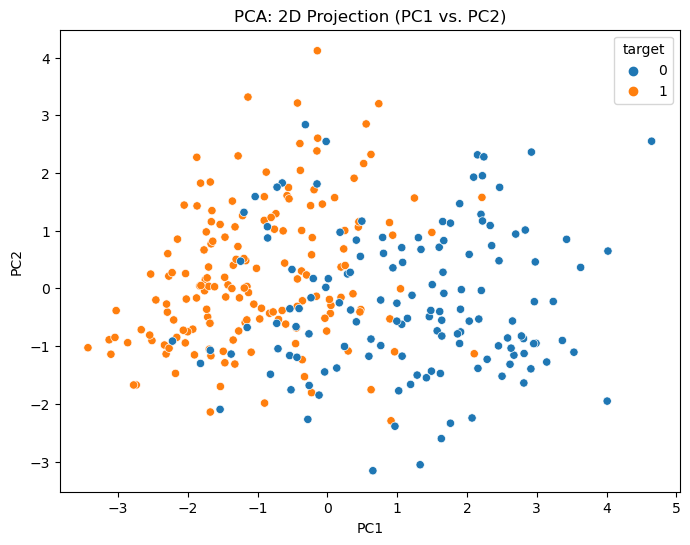

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=y, data=pca_df)
plt.title("PCA: 2D Projection (PC1 vs. PC2)")
plt.show()

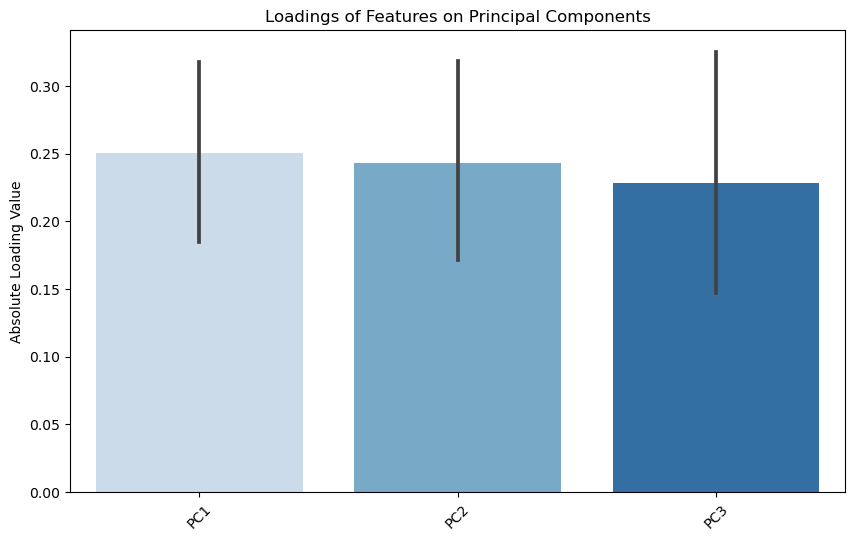

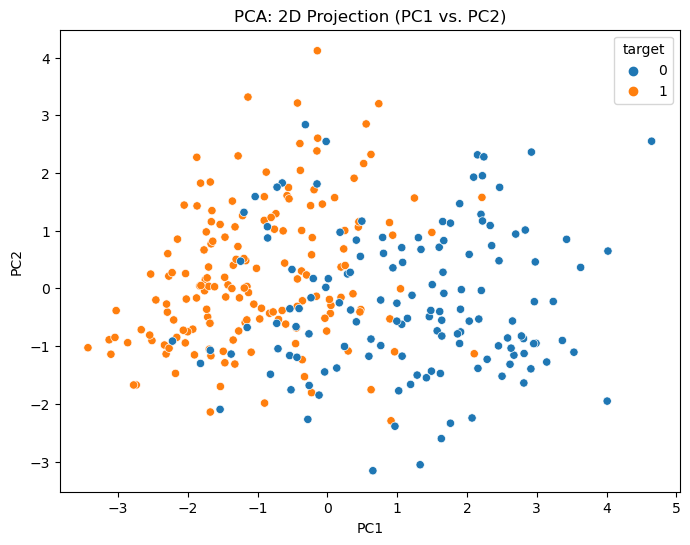

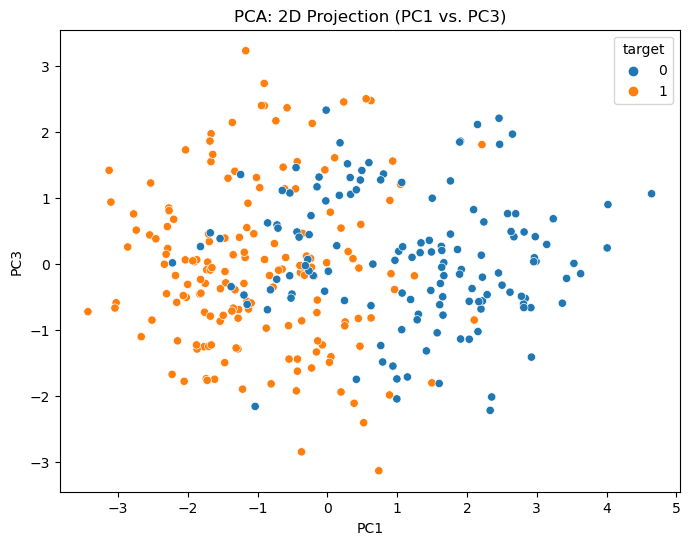

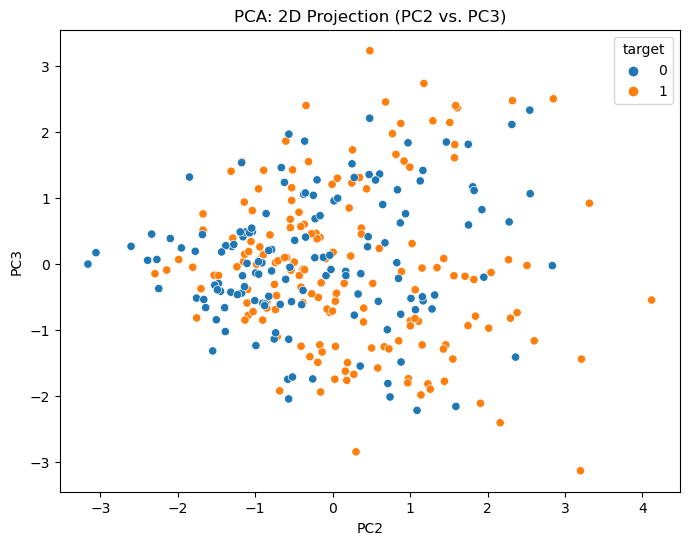

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset (replace 'heart_data.csv' with your actual file path)
data = pd.read_csv('heart.csv')

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 3 principal components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Set up matplotlib to display plots inline in the Jupyter notebook
%matplotlib inline

# Plot the loadings of each feature on each principal component
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2', 'PC3']).abs().T, palette='Blues')
plt.title("Loadings of Features on Principal Components")
plt.ylabel("Absolute Loading Value")
plt.xticks(rotation=45)
plt.show()

# Plot the data in the space defined by PC1 and PC2
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=y, data=pca_df)
plt.title("PCA: 2D Projection (PC1 vs. PC2)")
plt.show()

# Plot the data in the space defined by PC1 and PC3
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC3', hue=y, data=pca_df)
plt.title("PCA: 2D Projection (PC1 vs. PC3)")
plt.show()

# Plot the data in the space defined by PC2 and PC3
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC2', y='PC3', hue=y, data=pca_df)
plt.title("PCA: 2D Projection (PC2 vs. PC3)")
plt.show()


In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset (replace 'heart_data.csv' with your actual file path)
data = pd.read_csv('heart.csv')

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 3 principal components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
# Add the 'target' column back to pca_df
pca_df['target'] = y

# Print the interpretation of the first principal component (PC1)
print("First Principal Component (PC1):")
print("Explained Variance:", explained_variance_ratio[0])
print("Loadings:")
for feature, loading in zip(X.columns, pca.components_[0]):
    print(f"{feature}: {loading:.4f}")
print("Correlation with 'target':", pca_df['target'].corr(pca_df['PC1']))


First Principal Component (PC1):
Explained Variance: 0.2125405312185196
Loadings:
age: 0.3142
sex: 0.0908
cp: -0.2746
trestbps: 0.1839
chol: 0.1174
fbs: 0.0736
restecg: -0.1277
thalach: -0.4165
exang: 0.3613
oldpeak: 0.4196
slope: -0.3798
ca: 0.2733
thal: 0.2220
Correlation with 'target': -0.662173898135201


In [87]:
print("\nSecond Principal Component (PC2):")
print("Explained Variance:", explained_variance_ratio[1])
print("Loadings:")
for feature, loading in zip(X.columns, pca.components_[1]):
    print(f"{feature}: {loading:.4f}")
print("Correlation with 'target':", pca_df['target'].corr(pca_df['PC2']))


Second Principal Component (PC2):
Explained Variance: 0.11820707724327446
Loadings:
age: 0.4061
sex: -0.3778
cp: 0.2973
trestbps: 0.4382
chol: 0.3645
fbs: 0.3174
restecg: -0.2209
thalach: 0.0779
exang: -0.2631
oldpeak: -0.0523
slope: 0.0484
ca: 0.0941
thal: -0.2007
Correlation with 'target': 0.18465867986807574


In [88]:
print("\nThird Principal Component (PC3):")
print("Explained Variance:", explained_variance_ratio[0])
print("Loadings:")
for feature, loading in zip(X.columns, pca.components_[2]):
    print(f"{feature}: {loading:.4f}")
print("Correlation with 'target':", pca_df['target'].corr(pca_df['PC3']))


Third Principal Component (PC3):
Explained Variance: 0.2125405312185196
Loadings:
age: -0.0941
sex: 0.5548
cp: 0.3570
trestbps: 0.2038
chol: -0.4078
fbs: 0.4817
restecg: -0.0892
thalach: 0.1583
exang: -0.1264
oldpeak: 0.1103
slope: -0.0738
ca: 0.1836
thal: 0.1250
Correlation with 'target': -0.06003562510471636


* For the first principal component (Dimension 1), it has a relatively high positive loading for the original feature with the highest magnitude. However, it has a negative correlation with the 'target' variable, indicating that higher values of this principal component are associated with a lower likelihood of the target ('heart disease').

* The second principal component (Dimension 2) has a very high positive loading for the second feature and a moderate positive correlation with the 'target' variable . This suggests that higher values of this principal component are associated with the presence of the target ('heart disease').

* The third principal component (Dimension 3) has a positive loading for the third feature  and a very high positive correlation with the 'target' variable. This indicates that higher values of this principal component are strongly associated with the presence of the target ('heart disease').